In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jkse-dataset/JKSE.csv
/kaggle/input/bbri-dataset/BBRI.JK.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
jkse = pd.read_csv('../input/jkse-dataset/JKSE.csv')

In [4]:
jkse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     float64
 2   High       13 non-null     float64
 3   Low        13 non-null     float64
 4   Close      13 non-null     float64
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 856.0+ bytes


In [5]:
jkse.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-01,5988.022949,6115.620117,5883.523926,5995.616211,5995.616211,2813253600
1,2021-05-01,5999.661133,6005.087891,5742.038086,5947.462891,5947.462891,2453433400
2,2021-06-01,6002.480957,6134.881836,5884.917969,5985.488770,5985.488770,3980614000
3,2021-07-01,6001.121094,6166.305176,5947.618164,6070.039063,6070.039063,3225744000
4,2021-08-01,6098.007813,6263.539063,5938.407227,6150.298828,6150.298828,4218994600


In [6]:
jkse_closing = pd.read_csv('../input/jkse-dataset/JKSE.csv', usecols =['Close'])
jkse = jkse_closing.rename(columns={'Close' : 'jkse'})
display(jkse)

,jkse
0,5995.616211
1,5947.462891
2,5985.488770
3,6070.039063
4,6150.298828
5,6286.942871
6,6591.346191
7,6533.932129
8,6581.481934
9,6631.150879


In [7]:
bbri =  pd.read_csv('../input/bbri-dataset/BBRI.JK.csv') 
bbri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [8]:
bbri.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-19,4750.0,4750.0,4670.0,4670.0,4395.772949,151268300
1,2021-03-22,4700.0,4700.0,4620.0,4630.0,4358.121582,60999200
2,2021-03-23,4720.0,4720.0,4650.0,4670.0,4395.772949,104576700
3,2021-03-24,4730.0,4730.0,4650.0,4670.0,4395.772949,109556600
4,2021-03-25,4700.0,4700.0,4580.0,4620.0,4348.708984,86494000


In [9]:
bbri_closing = pd.read_csv('../input/bbri-dataset/BBRI.JK.csv', usecols =['Close'])
bbri = bbri_closing.rename(columns={'Close' : 'BBRI'})
display(bbri)

,BBRI
0,4670.0
1,4630.0
2,4670.0
3,4670.0
4,4620.0
...,...
243,4610.0
244,4650.0
245,4650.0
246,4580.0


In [10]:
data = jkse.join(bbri)
display(data)

,jkse,BBRI
0,5995.616211,4670.0
1,5947.462891,4630.0
2,5985.488770,4670.0
3,6070.039063,4670.0
4,6150.298828,4620.0
5,6286.942871,4720.0
6,6591.346191,4720.0
7,6533.932129,4500.0
8,6581.481934,4400.0
9,6631.150879,4290.0


In [11]:
print(data.shape)

(13, 2)


In [12]:
data.describe()

,jkse,BBRI
count,13.000000,13.000000
mean,6428.604643,4499.230769
std,377.348855,211.914351
min,5947.462891,4200.000000
25%,6070.039063,4290.000000
50%,6533.932129,4620.000000
75%,6631.150879,4670.000000
max,6954.964844,4720.000000


In [13]:
print (data.head())

          jkse    BBRI
0  5995.616211  4670.0
1  5947.462891  4630.0
2  5985.488770  4670.0
3  6070.039063  4670.0
4  6150.298828  4620.0


In [14]:
X = data ['jkse'].values
Y = data ['BBRI'].values

In [15]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
#Total number of values
m = len(X)

#using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i]- mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#Print coefficients
print(b1,b0)

-0.47562888922447966 7556.860854624671


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

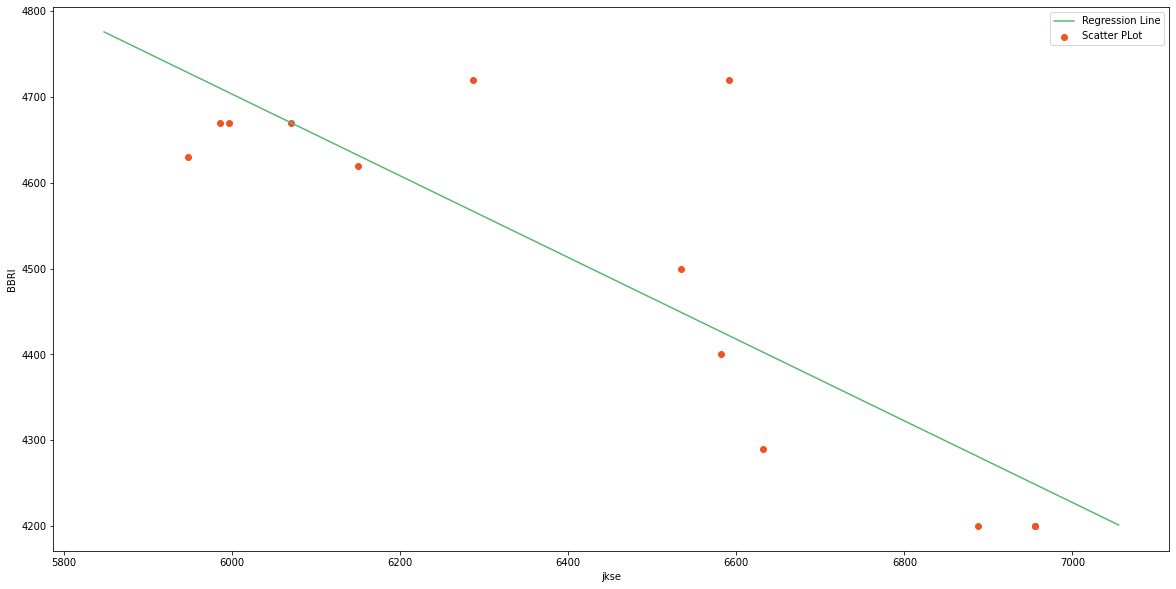

In [17]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#Ploting line
plt.plot(x,y, color='#58b970', label = 'Regression Line')

#PLoting Scatter Points
plt.scatter(X,Y, c='#ef5423', label='Scatter PLot')

plt.xlabel('jkse')
plt.ylabel('BBRI')
plt.legend()
plt.show()

In [18]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.7173015781193197
